This is my Jupitar Notebook for Kaggle competition /  Titanic - Machine Learning from Disaster
@Tharindu AKA Tardi

In [1434]:
#import libraries

import pandas as pd
import numpy as np
import missingno
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Data visualisation

import seaborn as sns
import matplotlib.pyplot as plt


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [1435]:
#import and read the data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [1436]:
#Display the first few rows of the training data

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1437]:
#Display the first few rows of the test data

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>Data description</h1>

The training dataset contains the following columns:

1. PassengerId: Unique ID for each passenger
2. Survived: Survival status (0 = No, 1 = Yes)
3. Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
4. Name: Name of the passenger
5. Sex: Gender of the passenger
6. Age: Age of the passenger
7. SibSp: Number of siblings/spouses aboard the Titanic
8. Parch: Number of parents/children aboard the Titanic
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Next, perform some basic data preprocessing such as handling missing values, encoding categorical features and feature engineering. Here's what it is:

Handle missing values.
Encode categorical features.
Create new features if necessary.


In [1438]:
# Non-null count and data types of the training and test set

train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [1439]:
# Handling Missing data in training set by columns

train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [1440]:
# Handling Missing data in test set by columns 

test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [1441]:
# Summary statistics for training set 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1442]:
# Summary statistics for test set 

test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h1>Feature analysis</h1>

<h4>Categorical variable: Sex</h4>

In [1443]:
# Value counts of the sex column

train_df['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

<h5>Note: There are more male passengers than female passengers on titanic</h5>

In [1444]:
# Mean of survival by sex

train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

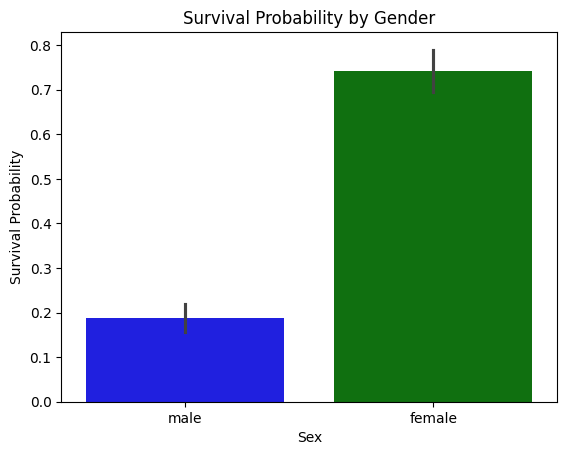

In [1445]:
# Data viz / Survival Probability by Gender
palette = {'female': 'green', 'male': 'blue'}
sns.barplot(x='Sex', y='Survived', data=train_df, hue='Sex', palette=palette, dodge=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

<h4>Categorical variable: Pclass</h4>

In [1446]:
# Value counts of the Pclass column 

train_df['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [1447]:
# Mean of survival by passenger class

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


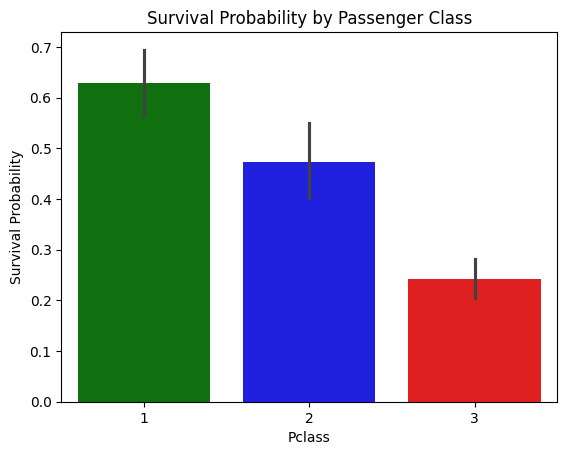

In [1448]:
#Data viz / Survival Probability by Passenger Class

palette = {1: 'green', 2: 'blue', 3: 'red'}
sns.barplot(x='Pclass', y='Survived', data=train_df, hue='Pclass', palette=palette, dodge=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')
plt.legend([],[], frameon=False)


<h5>Note: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation</h5>

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

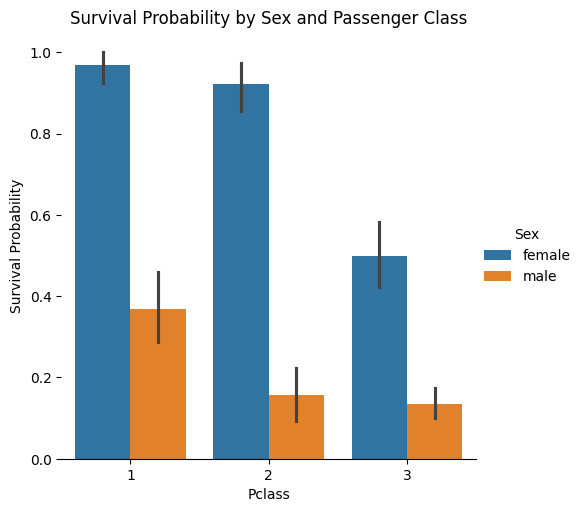

In [1449]:
# Dta viz / Survival Probability by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

<h4>Categorical variable: Embarked</h4>

In [1450]:
# Value counts of the Embarked column 

train_df['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [1451]:
# Mean of survival by point of embarkation

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

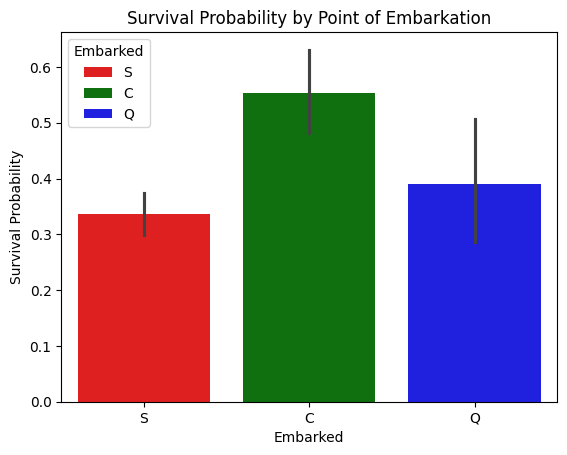

In [1452]:
#Data viz / Survival Probability by Point of Embarkation
palette = {'S': 'red', 'C': 'green', 'Q': 'blue'}
sns.barplot(x = 'Embarked', y ='Survived',  data=train_df, hue='Embarked', palette=palette, dodge=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

<h6>Survival probability is highest for location C and lowest for location S.</h6>
<h6>there could be a reason for this occurence </h6>
<h6>We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.</h6>

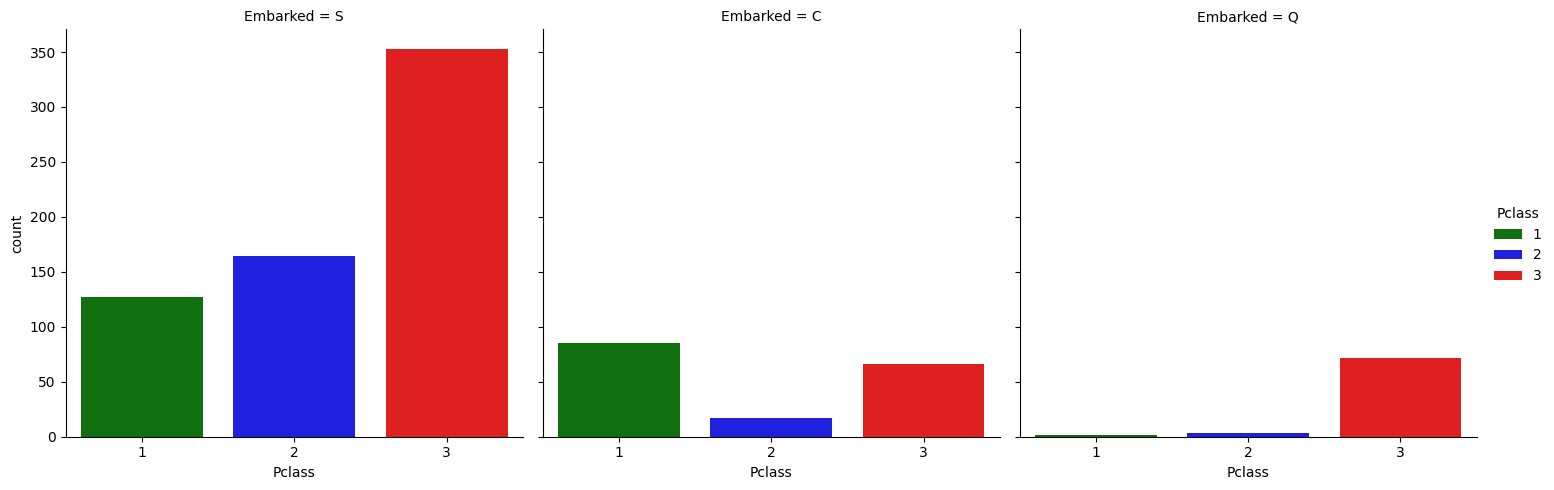

In [1453]:
#Data Viz
palette = {1: 'green', 2: 'blue', 3: 'red'}
sns.catplot(x='Pclass', col='Embarked', data=train_df, kind='count', hue='Pclass', palette=palette, dodge=False)

<h4>Numerical variables:</h4>

<h5>Numerical variables in our dataset are SibSp, Parch, Age and Fare.</h5>

Numerical variable: SibSp

In [1454]:
# Value counts of the SibSp column 

train_df['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [1455]:
# Mean of survival by SibSp

train_df[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

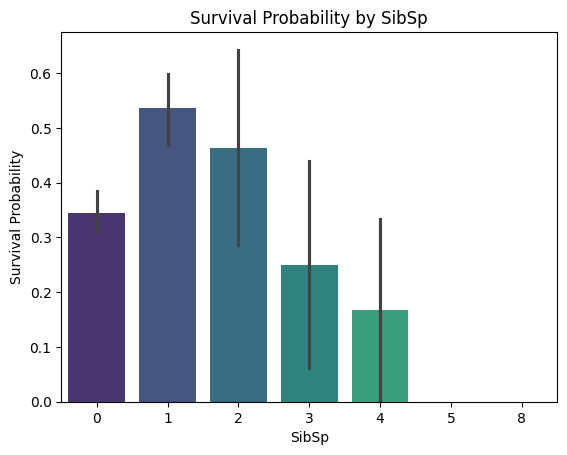

In [1456]:
#Data Viz
palette = sns.color_palette("viridis", n_colors=train_df['SibSp'].nunique()) #im so lazy to choose bar color so randamize it :
sns.barplot(x = 'SibSp', y ='Survived', data = train_df, palette=palette)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

Numerical variable: Parch

In [1457]:
# Value counts of the Parch column 

train_df['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [1458]:
# Mean of survival by Parch

train_df[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

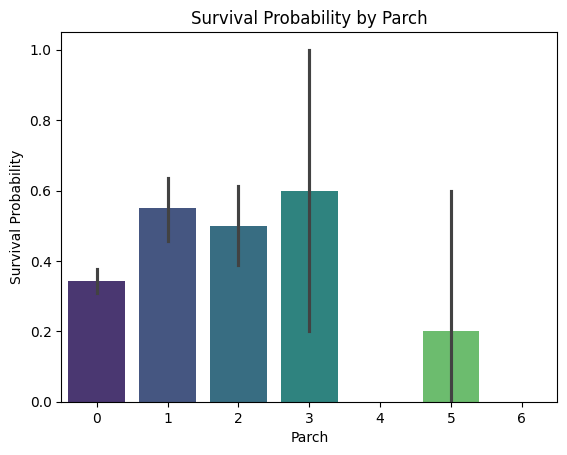

In [1459]:
#Data Viz
palette = sns.color_palette("viridis", n_colors=train_df['Parch'].nunique()) #im so lazy to choose bar color so randamize it :P
sns.barplot(x = 'Parch', y ='Survived', data = train_df, palette=palette)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

Numerical variable: Age

In [1460]:
# Null values in Age column 

train_df['Age'].isnull().sum()

np.int64(177)

Text(0.5, 1.0, 'Passenger Age Distribution')

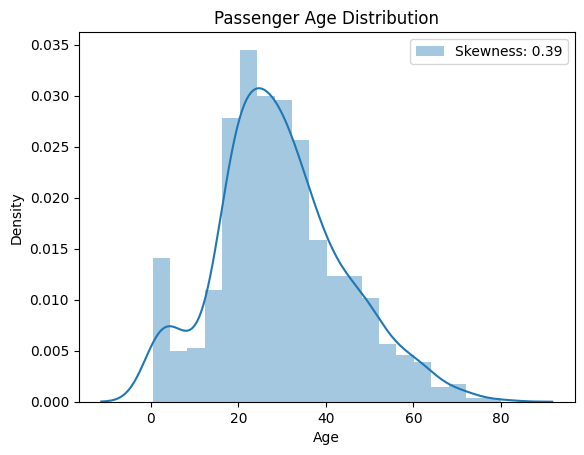

In [1461]:
#Data Viz / Passenger age distribution

sns.distplot(train_df['Age'], label = 'Skewness: %.2f'%(train_df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

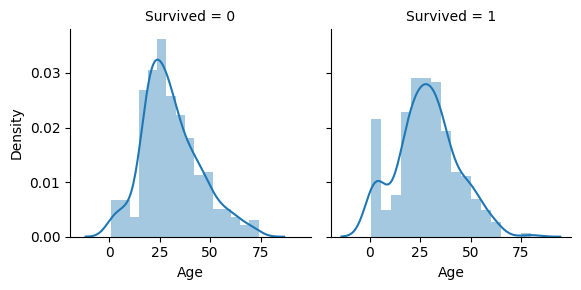

In [1462]:
# Age distribution by survival

g = sns.FacetGrid(train_df, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

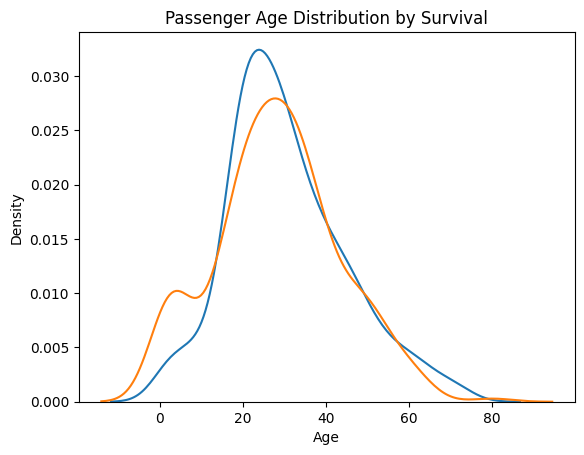

In [1463]:
#contd.
sns.kdeplot(train_df['Age'][train_df['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

Numerical variable: Fare

In [1464]:
# Null values of Fare column 

train_df['Fare'].isnull().sum()

np.int64(0)

Text(0, 0.5, 'Passenger Fare Distribution')

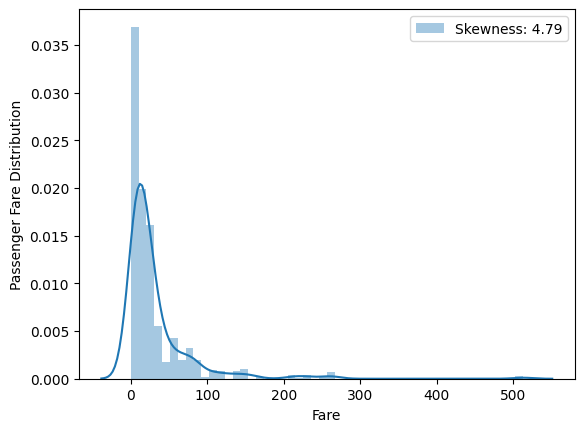

In [1465]:
# Data Viz / Passenger fare distribution

sns.distplot(train_df['Fare'], label = 'Skewness: %.2f'%(train_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

<h4>Data preprocessing</h4>

Drop and fill missing values

In [1466]:
# Missing values in training set 

train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [1467]:
# Compute the most frequent value of Embarked in training set

mode = train_df['Embarked'].dropna().mode()[0]
mode

'S'

In [1468]:
# Fill missing value in Embarked with mode

train_df['Embarked'].fillna(mode, inplace = True)

In [1469]:
# Missing values in test set

test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [1470]:
# Compute median of Fare in test set 

median = test_df['Fare'].dropna().median()
median

np.float64(14.4542)

In [1471]:
# Fill missing value in Fare with median

test_df['Fare'].fillna(median, inplace = True)

In [1472]:
# Combine training set and test set

combine = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1473]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
PassengerId       0
Name              0
Pclass            0
SibSp             0
Sex               0
Parch             0
Ticket            0
Fare              0
Embarked          0
dtype: int64

<h6>We can ignore missing values in the Survived column because all of them are from the test set. Now need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding</h6>

In [1474]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

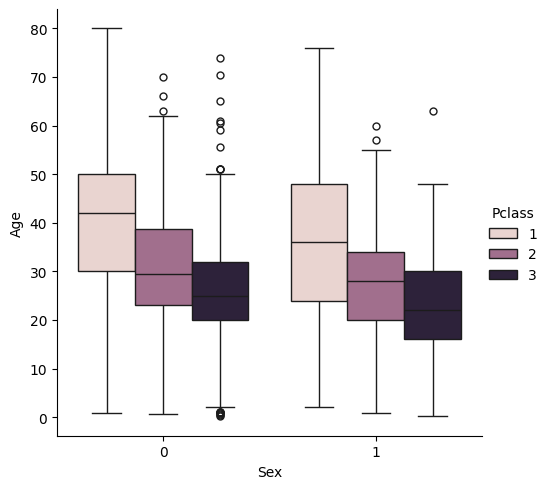

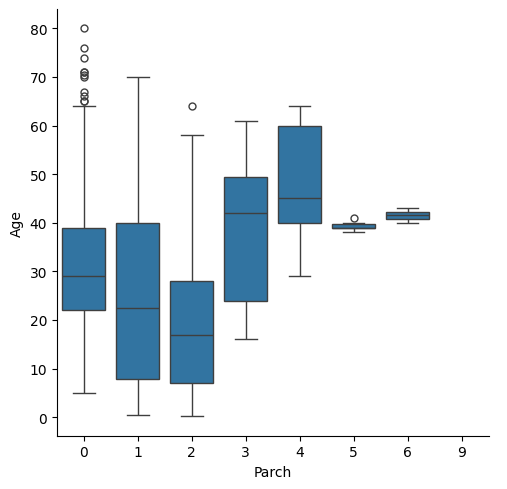

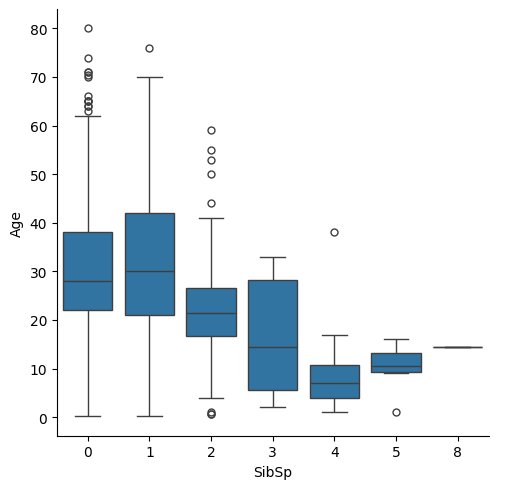

In [1475]:
#Data Viz
sns.catplot(y='Age', x='Sex', hue='Pclass', kind='box', data=combine)
sns.catplot(y='Age', x='Parch', kind='box', data=combine)
sns.catplot(y='Age', x='SibSp', kind='box', data=combine)


In [1476]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

263

In [1477]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) & (combine['Parch'] == combine.iloc[index]['Parch']) & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [1478]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

np.int64(0)

Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore,  applied a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

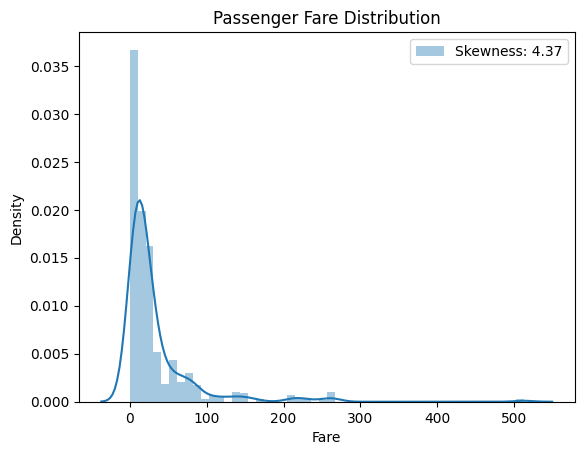

In [1479]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [1480]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

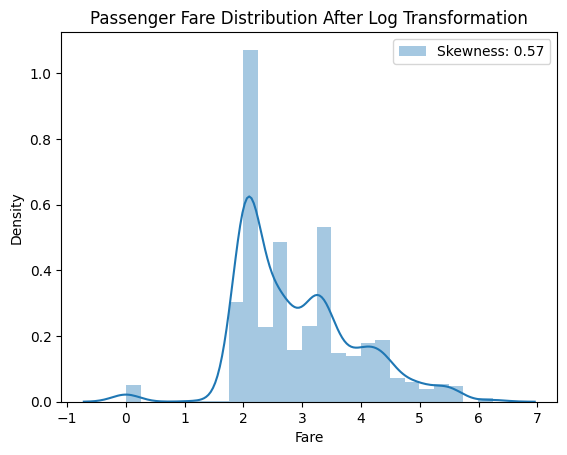

In [1481]:
# Data Viz / Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

<h4>Feature engineering</h4>


Feature engineering is arguably the most important art in machine learning

In this section, construct 3 new features:

#Title
#IsAlone
#Age*Class

Title

In [1482]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,S


In [1483]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [1484]:
# Value counts of Title

combine['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [1485]:
# Number of unique Title

combine['Title'].nunique()

18

In [1486]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess','Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

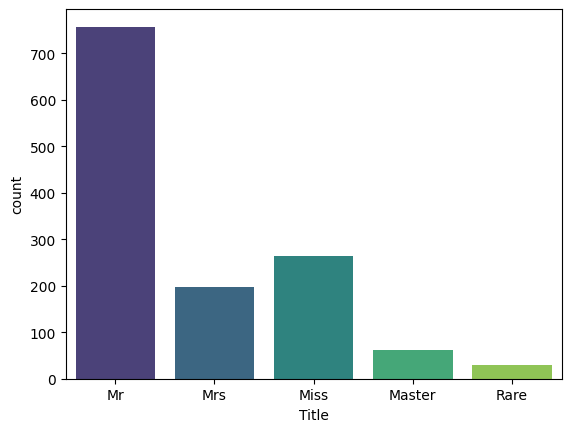

In [1487]:
#Data Viz

palette = sns.color_palette("viridis", n_colors=combine['Title'].nunique()) 
ax = sns.countplot(x='Title', data=combine, palette=palette)

In [1488]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


Text(0.5, 1.0, 'Mean of survival by Title')

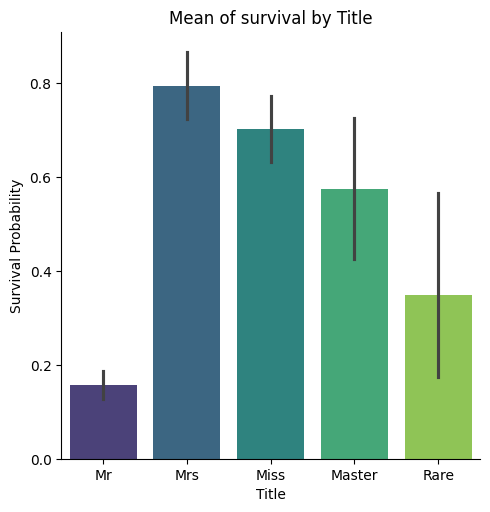

In [1489]:
#Data Viz

palette = sns.color_palette("viridis", n_colors=combine['Title'].nunique())
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar', palette=palette)
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [1490]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,Mr


 IsAlone

In [1491]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [1492]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [1493]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [1494]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [1495]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,A/5 21171,1.981001,NaN,S,Mr,0
1,2,1.0,1,1,38.0,PC 17599,4.266662,C85,C,Mrs,0
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.070022,NaN,S,Miss,1
3,4,1.0,1,1,35.0,113803,3.972177,C123,S,Mrs,0
4,5,0.0,3,0,35.0,373450,2.085672,NaN,S,Mr,1


Age*Class

In [1496]:
#To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values. We will group Ages into 5 separate age bands and assign a number to each age band.


# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.500000
1,"(16.136, 32.102]",0.341719
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [1497]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [1498]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [1499]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [1500]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [1501]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


<h3>Feature encoding</h3>

<h6>Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.</h6>

In [1502]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,A/5 21171,1.981001,NaN,S,Mr,0,3
1,2,1.0,1,1,2,PC 17599,4.266662,C85,C,Mrs,0,2
2,3,1.0,3,1,1,STON/O2. 3101282,2.070022,NaN,S,Miss,1,3
3,4,1.0,1,1,2,113803,3.972177,C123,S,Mrs,0,2
4,5,0.0,3,0,2,373450,2.085672,NaN,S,Mr,1,6


In [1503]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,A/5 21171,1.981001,NaN,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,PC 17599,4.266662,C85,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,STON/O2. 3101282,2.070022,NaN,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,113803,3.972177,C123,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,373450,2.085672,NaN,1,6,False,False,True,False,False,False,False,True


In [1504]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.504983
3,"(4.679, 6.239]",0.745098


In [1505]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [1506]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [1507]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,A/5 21171,1,NaN,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,PC 17599,2,C85,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,STON/O2. 3101282,1,NaN,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,113803,2,C123,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,373450,1,NaN,1,6,False,False,True,False,False,False,False,True


In [1508]:
# Separate training and test set from the combined dataframe

train = combine[:len(train_df)]
test_df = combine[len(train):]

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,A/5 21171,1,NaN,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,PC 17599,2,C85,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,STON/O2. 3101282,1,NaN,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,113803,2,C123,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,373450,1,NaN,1,6,False,False,True,False,False,False,False,True


In [1509]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,A/5 21171,1,NaN,0,3,False,False,True,False,False,False,False,True
1,1.0,1,1,2,PC 17599,2,C85,0,2,False,False,False,True,False,True,False,False
2,1.0,3,1,1,STON/O2. 3101282,1,NaN,1,3,False,True,False,False,False,False,False,True
3,1.0,1,1,2,113803,2,C123,0,2,False,False,False,True,False,False,False,True
4,0.0,3,0,2,373450,1,NaN,1,6,False,False,True,False,False,False,False,True


In [1510]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,A/5 21171,1,NaN,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,PC 17599,2,C85,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,STON/O2. 3101282,1,NaN,1,3,False,True,False,False,False,False,False,True
3,1,1,1,2,113803,2,C123,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,373450,1,NaN,1,6,False,False,True,False,False,False,False,True


In [1511]:
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,330911,1,NaN,1,6,False,False,True,False,False,False,True,False
892,893,NaN,3,1,2,363272,1,NaN,0,6,False,False,False,True,False,False,False,True
893,894,NaN,2,0,3,240276,1,NaN,1,6,False,False,True,False,False,False,True,False
894,895,NaN,3,0,1,315154,1,NaN,1,3,False,False,True,False,False,False,False,True
895,896,NaN,3,1,1,3101298,1,NaN,0,3,False,False,False,True,False,False,False,True


In [1512]:
# Drop passenger survived column from test set

test = test_df.drop('Survived', axis = 1)
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,330911,1,NaN,1,6,False,False,True,False,False,False,True,False
892,893,NaN,3,1,2,363272,1,NaN,0,6,False,False,False,True,False,False,False,True
893,894,NaN,2,0,3,240276,1,NaN,1,6,False,False,True,False,False,False,True,False
894,895,NaN,3,0,1,315154,1,NaN,1,3,False,False,True,False,False,False,False,True
895,896,NaN,3,1,1,3101298,1,NaN,0,3,False,False,False,True,False,False,False,True


<h1>Modelling</h1>

the dataset is now ready for modeling. The next steps are:

Selecting features for the model.
Splitting the data into training and validation sets.
Training a machine learning model.
Evaluating the model.

i'll start by selecting the features that i want to use for our model. i'll use the following features:
<p>Pclass</p>
         <p>Support vector machines</p>
         <p>Sex</p>
         <p>Age</p>
         <p>SibSp</p>
         <p>ParchC</p>
         <p>Fare</p>
         <p>Embarked</p>
        

Let's proceed with splitting the data and training a machine learning model. i will use a simple Logistic Regression model

Split training data

<h6>We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.</h6>

In [1513]:

# Handle missing values in the training data
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)

# Encode categorical features in the training data
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)



Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Next, i'll use this model to make predictions on the test dataset and prepare the submission file.

Let's load the test.csv file, process it similarly to the training data and make predictions.

In [1516]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Handle missing values in the training data
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)

# Handle missing values in the test data
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Combine the unique categories from both the training and test sets
combined_sex = pd.concat([train_df['Sex'], test_df['Sex']]).unique()
combined_embarked = pd.concat([train_df['Embarked'], test_df['Embarked']]).unique()

# Fit the LabelEncoder on the combined unique categories
sex_encoder = LabelEncoder().fit(combined_sex)
embarked_encoder = LabelEncoder().fit(combined_embarked)

# Encode categorical features in the training data
train_df['Sex'] = sex_encoder.transform(train_df['Sex'])
train_df['Embarked'] = embarked_encoder.transform(train_df['Embarked'])

# Encode categorical features in the test data
test_df['Sex'] = sex_encoder.transform(test_df['Sex'])
test_df['Embarked'] = embarked_encoder.transform(test_df['Embarked'])

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Make predictions on the test data
X_test = test_df[features]
test_df['Survived'] = model.predict(X_test)

# Prepare the submission file
submission = test_df[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)



Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

